In [6]:
import matplotlib.pyplot as plt
import data
import utils

In [7]:
import ncvis
# ds = data.MNIST()
# ds = data.PenDigits()
ds = data.COIL20()
# ds = data.COIL100()

vis = ncvis.NCVis(n_init_epochs=20, n_epochs=100, min_dist=0.3)

Processing files:100% (1440 of 1440) |###| Elapsed Time: 0:00:00 Time:  0:00:00


In [8]:
%%time
Y = vis.fit(ds.X)

CPU times: user 19 s, sys: 129 ms, total: 19.1 s
Wall time: 1.69 s


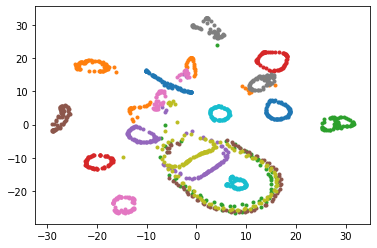

In [9]:
fig, ax = plt.subplots(1, 1)
utils.scatter_classes(Y, ds.y, ax, marker='.')
plt.show()